In [1]:
# tiny reconstruction module here to ass the problem of cosine
# Importing libraries 
import os
import sys
sys.path.append(r"C:\Users\Alireza\Documents\Git\Cosine-Project")
from inSilico_experiments.utils.func_lib import *

from core.utils.GAN_utils import upconvGAN
from core.utils.CNN_scorers import TorchScorer
#%% 
# Set parameters
refimgdir = r"C:\Data\cosine\insilico_experiments\data\single_image"

net_name = "alexnet"
layer_name_list = [".features.Conv2d10", ".features.Conv2d8",
                   ".features.Conv2d6", ".features.Conv2d3"]
gan_name  = "fc6"
layer_short = ["conv5", "conv4", "conv3", "conv2"]
popsize_list_list = [[1, 2, 4, 8, 16, 32, 64, 128, 256],
                     [1, 2, 4, 8, 16, 32, 64, 128, 256],
                     [1, 2, 4, 8, 16, 32, 64, 128, 256, 384],
                     [1, 2, 4, 8, 16, 32, 64, 128, 192]]

input_size = (3, 227, 227)
# save path 
saving_root = r"N:\PonceLab\Users\Alireza\insilico_experiments\Alexnet_remonstration_across_different_layer_062023\post_processed"
saving_path = os.path.join(saving_root, "rf_filters")
os.makedirs(saving_path, exist_ok=True)
i = 0
for layer_name in layer_name_list:
    for popsize in popsize_list_list[i]:
        G = upconvGAN(gan_name).cuda()
        G.requires_grad_(False)
        scorer = TorchScorer(net_name)

        unit_mask_dict_random, unit_tsridx_dict_random = set_random_population_recording(
                                scorer, [layer_name], popsize=popsize, seed=0)

        fitdict = fr_estimatir(scorer, G, unit_tsridx_dict_random, layer_name, input_size,show_fig=False)
        # save the rf filter as a numpy zip file
        np.savez(os.path.join(saving_path, f"{layer_short[i]}_{popsize}.npz"), **fitdict)
    i += 1


c:\Users\Alireza\miniconda3\envs\cosine-project\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Alireza\miniconda3\envs\cosine-project\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Layer .features.Conv2d10 Sampled 1 units from feature tensor of shape (256, 13, 13)
Gaussian Fitting center (110.1, 110.6)
 Cov mat XX 904.4 YY 861.5 XY -11.9
Layer .features.Conv2d10 Sampled 2 units from feature tensor of shape (256, 13, 13)
Gaussian Fitting center (110.8, 111.0)
 Cov mat XX 882.0 YY 829.3 XY -20.5
Layer .features.Conv2d10 Sampled 4 units from feature tensor of shape (256, 13, 13)
Gaussian Fitting center (109.2, 111.5)
 Cov mat XX 828.4 YY 796.9 XY -11.4
Layer .features.Conv2d10 Sampled 8 units from feature tensor of shape (256, 13, 13)
Gaussian Fitting center (109.5, 110.9)
 Cov mat XX 857.9 YY 817.8 XY -22.3
Layer .features.Conv2d10 Sampled 16 units from feature tensor of shape (256, 13, 13)
Gaussian Fitting center (109.8, 110.4)
 Cov mat XX 883.2 YY 828.4 XY -22.4
Layer .features.Conv2d10 Sampled 32 units from feature tensor of shape (256, 13, 13)
Gaussian Fitting center (110.1, 111.0)
 Cov mat XX 877.2 YY 811.9 XY -23.3
Layer .features.Conv2d10 Sampled 64 units fr

In [4]:
# tiny reconstruction module here to ass the problem of cosine
# Importing libraries 
import os
import sys
sys.path.append(r"C:\Users\Alireza\Documents\Git\Cosine-Project")
from inSilico_experiments.utils.func_lib import *

from core.utils.GAN_utils import upconvGAN
from core.utils.CNN_scorers import TorchScorer
#%% 
# Set parameters
refimgdir = r"C:\Data\cosine\insilico_experiments\data\single_image"

net_names = ["resnet50", "resnet50_linf_8", "cornet_s"]
layer_name_list = [[".layer1.2.BatchNorm2dbn3", ".layer2.3.BatchNorm2dbn3", ".layer3.5.BatchNorm2dbn3", ".layer4.2.BatchNorm2dbn3"],
                   [".layer1.2.BatchNorm2dbn3", ".layer2.3.BatchNorm2dbn3", ".layer3.5.BatchNorm2dbn3", ".layer4.2.BatchNorm2dbn3"],
                   [".V1.BatchNorm2dnorm2", ".V2.BatchNorm2dnorm3_1", ".V4.BatchNorm2dnorm3_3", ".IT.BatchNorm2dnorm3_1"]]
gan_name  = "fc6"
layer_short = [["layer1", "layer2", "layer3", "layer4"], ["layer1", "layer2", "layer3", "layer4"], ["v1", "v2", "v4", "IT"]]
popsize_max_list = [[256, 512, 1024, 2048], [256, 512, 1024, 2048], [64, 128, 256, 512]]
input_size = (3, 227, 227)
# save path 
saving_path = r"N:\PonceLab\Users\Alireza\insilico_experiments\rf_filters"
os.makedirs(saving_path, exist_ok=True)
for net_name, layer_name_list, layer_short, popsize_max_list in zip(net_names, layer_name_list, layer_short, popsize_max_list):
    for i, layer_name in enumerate(layer_name_list):
        # get all 2 powers from2 to popsize_max[I]
        for popsize in [2**i for i in range(int(np.log2(popsize_max_list[i]))+1)]:
            G = upconvGAN(gan_name).cuda()
            G.requires_grad_(False)
            scorer = TorchScorer(net_name)
            unit_mask_dict_random, unit_tsridx_dict_random = set_random_population_recording(
                                    scorer, [layer_name], popsize=popsize, seed=0)

            fitdict = fr_estimatir(scorer, G, unit_tsridx_dict_random, [layer_name], input_size,show_fig=False)
            # save the rf filter as a numpy zip file
            np.savez(os.path.join(saving_path, f"{net_name}_{layer_short[i]}_{popsize}.npz"), **fitdict)
            scorer.cleanup()

use the default resnet50 weights
Layer .layer1.2.BatchNorm2dbn3 Sampled 1 units from feature tensor of shape (256, 57, 57)
Gaussian Fitting center (113.2, 112.8)
 Cov mat XX 27.4 YY 28.4 XY 0.6
Cleanuping...
Cleanup hooks done.
Cleanup done.
use the default resnet50 weights
Layer .layer1.2.BatchNorm2dbn3 Sampled 2 units from feature tensor of shape (256, 57, 57)
Gaussian Fitting center (113.2, 113.0)
 Cov mat XX 23.8 YY 25.1 XY 0.1
Cleanuping...
Cleanup hooks done.
Cleanup done.
use the default resnet50 weights
Layer .layer1.2.BatchNorm2dbn3 Sampled 4 units from feature tensor of shape (256, 57, 57)
Gaussian Fitting center (112.9, 113.0)
 Cov mat XX 25.3 YY 25.0 XY -0.6
Cleanuping...
Cleanup hooks done.
Cleanup done.
use the default resnet50 weights
Layer .layer1.2.BatchNorm2dbn3 Sampled 8 units from feature tensor of shape (256, 57, 57)
Gaussian Fitting center (113.0, 113.1)
 Cov mat XX 25.2 YY 25.5 XY -0.4
Cleanuping...
Cleanup hooks done.
Cleanup done.
use the default resnet50 weigh

In [7]:
# tiny reconstruction module here to ass the problem of cosine
# Importing libraries 
import os
import sys
sys.path.append(r"C:\Users\Alireza\Documents\Git\Cosine-Project")
from inSilico_experiments.utils.func_lib import *

from core.utils.GAN_utils import upconvGAN
from core.utils.CNN_scorers import TorchScorer
#%% 
# Set parameters
refimgdir = r"C:\Data\cosine\insilico_experiments\data\single_image"

net_names = ["alexnet"]
layer_name_list = [[".features.Conv2d3", ".features.Conv2d6", ".features.Conv2d8", ".features.Conv2d10"]]
gan_name  = "fc6"
layer_short = [["conv2", "conv3", "conv4", "conv5"]]
popsize_max_list = [[192, 384, 256, 256]]
input_size = (3, 227, 227)
# save path 
saving_path = r"N:\PonceLab\Users\Alireza\insilico_experiments\rf_filters"
os.makedirs(saving_path, exist_ok=True)
for net_name, layer_name_list, layer_short, popsize_max_list in zip(net_names, layer_name_list, layer_short, popsize_max_list):
    for i, layer_name in enumerate(layer_name_list):
        # get all 2 powers from2 to popsize_max[I]
        for popsize in [2**i for i in range(int(np.log2(popsize_max_list[i]))+1)]:
            G = upconvGAN(gan_name).cuda()
            G.requires_grad_(False)
            scorer = TorchScorer(net_name)
            unit_mask_dict_random, unit_tsridx_dict_random = set_random_population_recording(
                                    scorer, [layer_name], popsize=popsize, seed=0)

            fitdict = fr_estimatir(scorer, G, unit_tsridx_dict_random, [layer_name], input_size,show_fig=False)
            # save the rf filter as a numpy zip file
            np.savez(os.path.join(saving_path, f"{net_name}_{layer_short[i]}_{popsize}.npz"), **fitdict)
            scorer.cleanup()
        if popsize < popsize_max_list[i]:
            popsize = popsize_max_list[i]
            G = upconvGAN(gan_name).cuda()
            G.requires_grad_(False)
            scorer = TorchScorer(net_name)
            unit_mask_dict_random, unit_tsridx_dict_random = set_random_population_recording(
                                    scorer, [layer_name], popsize=popsize, seed=0)

            fitdict = fr_estimatir(scorer, G, unit_tsridx_dict_random, [layer_name], input_size,show_fig=False)
            # save the rf filter as a numpy zip file
            np.savez(os.path.join(saving_path, f"{net_name}_{layer_short[i]}_{popsize}.npz"), **fitdict)
            scorer.cleanup()

c:\Users\Alireza\miniconda3\envs\cosine-project\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Alireza\miniconda3\envs\cosine-project\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Layer .features.Conv2d3 Sampled 1 units from feature tensor of shape (192, 27, 27)
Gaussian Fitting center (110.3, 110.9)
 Cov mat XX 152.4 YY 148.6 XY -2.2
Cleanuping...
Cleanup hooks done.
Cleanup done.
Layer .features.Conv2d3 Sampled 2 units from feature tensor of shape (192, 27, 27)
Gaussian Fitting center (110.4, 111.4)
 Cov mat XX 154.3 YY 152.2 XY -3.1
Cleanuping...
Cleanup hooks done.
Cleanup done.
Layer .features.Conv2d3 Sampled 4 units from feature tensor of shape (192, 27, 27)
Gaussian Fitting center (110.9, 111.3)
 Cov mat XX 144.1 YY 141.6 XY -2.1
Cleanuping...
Cleanup hooks done.
Cleanup done.
Layer .features.Conv2d3 Sampled 8 units from feature tensor of shape (192, 27, 27)
Gaussian Fitting center (109.8, 111.0)
 Cov mat XX 144.3 YY 141.9 XY 2.7
Cleanuping...
Cleanup hooks done.
Cleanup done.
Layer .features.Conv2d3 Sampled 16 units from feature tensor of shape (192, 27, 27)
Gaussian Fitting center (110.8, 111.8)
 Cov mat XX 140.7 YY 127.1 XY 4.2
Cleanuping...
Cleanup ho

In [5]:
fitdict

{'popt': array([ 1.09653177e-02,  1.27273733e+02,  1.39157093e+02,  5.75232973e+01,
         6.05346700e+01, -5.89187434e-01, -3.78607653e-04]),
 'amplitude': 0.010965317668905506,
 'xo': 127.27373334243681,
 'yo': 139.15709348660155,
 'sigma_x': 57.52329730476035,
 'sigma_y': 60.53466997375765,
 'theta': -0.5891874341040978,
 'offset': -0.00037860765251613096,
 'gradAmpmap': array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.0007726 , 0.00085843,
         0.00042728],
        [0.        , 0.        , 0.        , ..., 0.00061107, 0.00042268,
         0.00041083],
        [0.        , 0.        , 0.        , ..., 0.00050461, 0.00042344,
         0.00037745]], dtype=float32),
 'fitmap': array

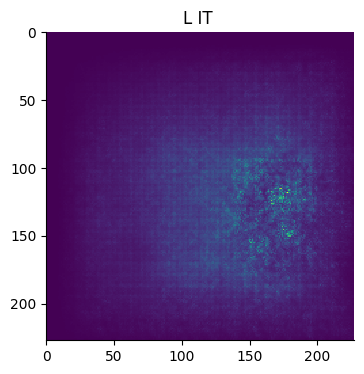

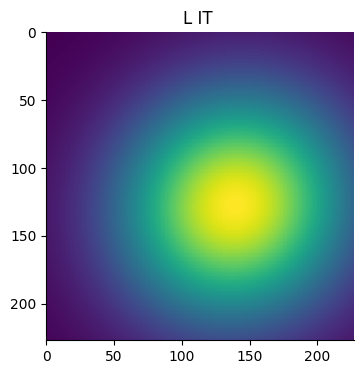

In [6]:
gradAmpmap = fitdict["gradAmpmap"]
plt.figure(figsize=[4, 4])
plt.pcolor(gradAmpmap)
plt.gca().invert_yaxis()
plt.axis("image")
plt.title("L %s "%(layer_short[i]))
plt.show()

fit_amp = fitdict["fitmap"]
plt.figure(figsize=[4, 4])
plt.pcolor(fit_amp)
plt.gca().invert_yaxis()
plt.axis("image")
plt.title("L %s "%(layer_short[i]))
plt.show()

In [4]:
import pandas as pd
import os
# First let read all metadata data frames and concatenate them into one with one extera column for the image root path and one for the image folder
# read other batch of metadata files
data_root_batch = r"N:\PonceLab\Users\Alireza\insilico_experiments\Alexnet_remonstration_across_different_layer_062023\raw_data\O2_cluster_exp_062123\meta_data_files"
# read all metadata files in the formt of "*_most_*.h5" folder and concatenate them into one
# the metadata files are saved in h5 format with the key "expriment_meta_data_df"
meta_data_df_batch = pd.DataFrame()
for file in os.listdir(data_root_batch):
    # we want to read all data with that have most in their name
    if file.endswith(".h5") and "random" in file:
        #print(f"reading file {file}")
        metadata_df = pd.read_hdf((data_root_batch+ "\\"+ file), key="expriment_meta_data_df")
        # each file is saved with the name of the data folder with a suffix of a random number at the end of the name taht
        # splited with "_" so we want to extract the data folder name from the file name and add it as a column to the metadata data frame
        folder_name = file.split("_")[1]
        for si in file.split("_")[2:-1]:
            folder_name = folder_name +("_"+si)

        metadata_df["data_root"] = r"/n/scratch3/users/a/ala2226/O2_cluster_exp_062123"+"//"+\
                                                folder_name
        print("number of repited index in the metadata data frame: ", metadata_df.index.duplicated().sum())
        meta_data_df_batch = pd.concat([meta_data_df_batch, metadata_df], axis=0)

metadata_df = meta_data_df_batch
# save the metadata data frame

saving_root = r"N:\PonceLab\Users\Alireza\insilico_experiments\Alexnet_remonstration_across_different_layer_062023\post_processed"
metadata_df.to_hdf(os.path.join(saving_root, "metadata_random_df_o2.h5"), key="metadata_df")

import pandas as pd
data_path = r"N:\PonceLab\Users\Alireza\insilico_experiments\Alexnet_remonstration_across_different_layer_062023\post_processed"
metadata_df_cosine_most = pd.read_hdf(os.path.join(data_path, "metadata_random_df_o2.h5"), key="metadata_df")
metadata_df_cosine_most.iloc[1]["data_root"]

number of repited index in the metadata data frame:  0
number of repited index in the metadata data frame:  0
number of repited index in the metadata data frame:  0
number of repited index in the metadata data frame:  0
number of repited index in the metadata data frame:  0
number of repited index in the metadata data frame:  0
number of repited index in the metadata data frame:  0
number of repited index in the metadata data frame:  0
number of repited index in the metadata data frame:  0
number of repited index in the metadata data frame:  0
number of repited index in the metadata data frame:  0
number of repited index in the metadata data frame:  0
number of repited index in the metadata data frame:  0
number of repited index in the metadata data frame:  0
number of repited index in the metadata data frame:  0
number of repited index in the metadata data frame:  0
number of repited index in the metadata data frame:  0
number of repited index in the metadata data frame:  0
number of 

C:\Users\Alireza\AppData\Local\Temp\ipykernel_7556\1272995514.py:29: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block2_values] [items->Index(['output_type', 'trget_imge_name', 'similarity_metric', 'gan_name',
       'layer_name', 'layer_short', 'net_name', 'img_size', 'pading_size',
       'input_size', 'pop_unit_idx', 'sub_pop_type', 'gen_rerun_id',
       'data_root'],
      dtype='object')]

  metadata_df.to_hdf(os.path.join(saving_root, "metadata_random_df_o2.h5"), key="metadata_df")


'/n/scratch3/users/a/ala2226/O2_cluster_exp_062123//data_alexnet_random_fc6_conv2_128_cosine'

In [20]:
# load the rf filter
rf_filter = np.load(os.path.join(saving_path, f"{layer_short[i]}_{popsize}.npz"))
# show rf filter attributes
rf_filter.files

['popt',
 'amplitude',
 'xo',
 'yo',
 'sigma_x',
 'sigma_y',
 'theta',
 'offset',
 'gradAmpmap',
 'fitmap']